<a href="https://colab.research.google.com/github/XimenaCantera/LimpiezaAgentes/blob/main/Actividad1_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [60]:
pip install matplotlib


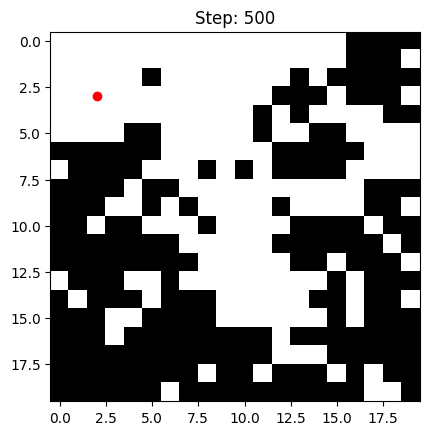

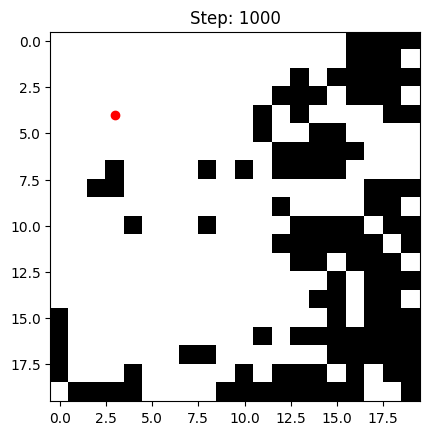

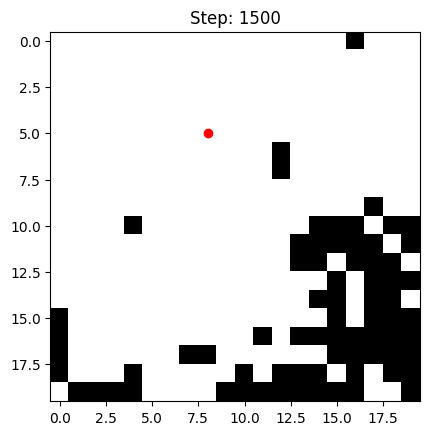

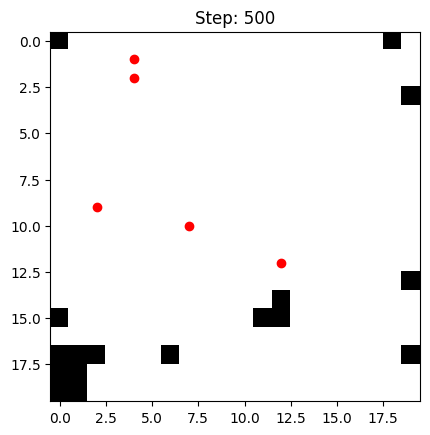

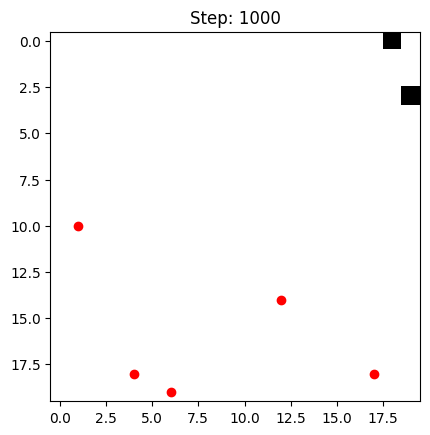

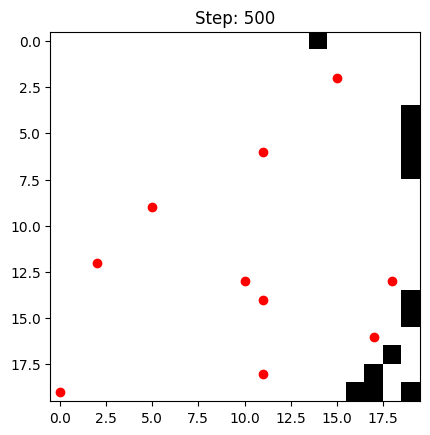

{1: {'paso': 1500, 'limpio': False, 'limpiaPorcentaje500': 49.25000000000001, 'limpiaPorcentaje1000': 70.5, 'limpiaPorcentaje1500': 81.75}, 5: {'paso': 1117, 'limpio': True, 'limpiaPorcentaje500': 95.75, 'limpiaPorcentaje1000': 99.5, 'limpiaPorcentaje1500': 0}, 10: {'paso': 579, 'limpio': True, 'limpiaPorcentaje500': 97.0, 'limpiaPorcentaje1000': 0, 'limpiaPorcentaje1500': 0}}


In [67]:
import random
import numpy as np
import matplotlib.pyplot as plt

class RobotLimpiar:
    def __init__(self, tamanio, numAgentes, suciedad):
        self.tamanio = tamanio
        self.numAgentes = numAgentes
        self.suciedad = suciedad
        self.cuadricula = self.inicializarCuadricula()
        self.agentes = self.inicializarAgentes()

    def inicializarCuadricula(self):
        cuadricula = np.zeros((self.tamanio, self.tamanio))
        numCeldas = int(self.tamanio * self.tamanio * self.suciedad)
        posicion = random.sample(range(self.tamanio * self.tamanio), numCeldas)
        for pos in posicion:
            cuadricula[pos // self.tamanio][pos % self.tamanio] = 1
        return cuadricula

    def inicializarAgentes(self):
        agentes = []
        for _ in range(self.numAgentes):
            x = random.randint(0, self.tamanio - 1)
            y = random.randint(0, self.tamanio - 1)
            agentes.append((x, y))
        return agentes

    def moverAgente(self, x, y):
        direcciones = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        random.shuffle(direcciones)
        for dx, dy in direcciones:
            nx, ny = x + dx, y + dy
            if 0 <= nx < self.tamanio and 0 <= ny < self.tamanio:
                return nx, ny
        return x, y

    def pasos(self):
        for i in range(self.numAgentes):
            x, y = self.agentes[i]
            if self.cuadricula[x][y] == 1:
                self.cuadricula[x][y] = 0
            else:
                x, y = self.moverAgente(x, y)
            self.agentes[i] = (x, y)

    def simulacion(self, maximo):
        paso = 0
        porcentajes = {500: 0, 1000: 0, 1500: 0}
        while paso < maximo and np.sum(self.cuadricula) > 0:
            self.pasos()
            paso += 1
            if paso in porcentajes:
                porcentajes[paso] = self.limpiarPorcentaje()
                self.plot_grid(paso)
        return paso, np.sum(self.cuadricula) == 0, porcentajes

    def limpiarPorcentaje(self):
        return 100 * (1 - np.sum(self.cuadricula) / (self.tamanio * self.tamanio))

    def plot_grid(self, step):
        plt.imshow(self.cuadricula, cmap='gray_r')
        for x, y in self.agentes:
            plt.scatter(y, x, color='red')
        plt.title(f'Step: {step}')
        plt.show()

def iniciarSimulacion(tamanio=20, suciedad=0.8, numAgentesLista=[1, 5, 10], maximo=1500):
    resultados = {}
    for numAgentes in numAgentesLista:
        robot = RobotLimpiar(tamanio, numAgentes, suciedad)
        paso, limpio, porcentajes = robot.simulacion(maximo)
        resultados[numAgentes] = {
            'paso': paso,
            'limpio': limpio,
            'limpiaPorcentaje500': porcentajes[500],
            'limpiaPorcentaje1000': porcentajes[1000],
            'limpiaPorcentaje1500': porcentajes[1500]
        }
    return resultados

if __name__ == "__main__":
    resultados = iniciarSimulacion()
    print(resultados)
